In [20]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm
import numpy as np

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline

%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models/periodic"

tasks = [
    "sum_sine_regression", 
    # "radial_sine_regression", 
    # "linear_sine_regression", 
    # "linear_modulo_regression", 
    # "saw_regression", 
    # "square_wave_regression", 
    # "triangle_wave_regression",
]

task_to_title = {
    "sum_sine_regression": "Sum Sine Regression", 
    "radial_sine_regression": "Radial Sine Regression",
    "linear_sine_regression": "Linear Sine Regression",
    "linear_modulo_regression": "Linear Modulo Regression",
    "saw_regression": "Saw Wave Regression",
    "square_wave_regression": "Square Wave Regression",
    "triangle_wave_regression": "Triangle Wave Regression",
}

df = read_run_dir(run_dir)
df # list all the runs in our run_dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
3,ef14b05a-d15a-4418-a47d-1ca6be3df829,linear_modulo_regression,Transformer,,-1,-1,20,12,8,linear_modulo_regression_standard
4,1643cdec-59ca-4f8e-ae37-1f9c73c31d8a,linear_sine_regression,Transformer,,-1,-1,20,12,8,linear_sine_regression_standard
0,b3d2bde5-95b7-4227-96b3-1cad688fec80,radial_sine_regression,Transformer,,-1,-1,20,12,8,radial_sine_regression_standard
6,8b1e67d2-cd30-4c7d-95fd-ce32a2e5e22e,saw_regression,Transformer,,-1,-1,20,12,8,saw_regression_standard
1,cb16b7e7-92c0-47fa-8a5b-40f9840f7e17,square_wave_regression,Transformer,,-1,-1,20,12,8,square_wave_regression_standard
2,1468ab06-745f-43e9-9795-77053ef5cabf,sum_sine_regression,Transformer,,-1,-1,20,12,8,sum_sine_regression_standard
5,9130cfcc-bc09-4887-ae64-2d0a869f8718,triangle_wave_regression,Transformer,,-1,-1,20,12,8,triangle_wave_regression_standard


  0%|          | 0/17 [00:00<?, ?it/s]

Computing Evaluation scale-y=100 on Model gpt2_embd=256_layer=12_head=8
Evaluating batch 1 of 20
Evaluating batch 2 of 20
Evaluating batch 3 of 20
Evaluating batch 4 of 20
Evaluating batch 5 of 20
Evaluating batch 6 of 20
Evaluating batch 7 of 20
Evaluating batch 8 of 20
Evaluating batch 9 of 20
Evaluating batch 10 of 20
Evaluating batch 11 of 20
Evaluating batch 12 of 20
Evaluating batch 13 of 20
Evaluating batch 14 of 20
Evaluating batch 15 of 20
Evaluating batch 16 of 20
Evaluating batch 17 of 20
Evaluating batch 18 of 20
Evaluating batch 19 of 20
Evaluating batch 20 of 20
Computing Evaluation scale-y=100 on Model NN_n=3_uniform
Evaluating batch 1 of 20
Evaluating batch 2 of 20
Evaluating batch 3 of 20
Evaluating batch 4 of 20
Evaluating batch 5 of 20
Evaluating batch 6 of 20
Evaluating batch 7 of 20
Evaluating batch 8 of 20
Evaluating batch 9 of 20
Evaluating batch 10 of 20
Evaluating batch 11 of 20
Evaluating batch 12 of 20
Evaluating batch 13 of 20
Evaluating batch 14 of 20
Evalu

 94%|█████████▍| 16/17 [00:07<00:00,  2.15it/s]

Computing Evaluation extrapolation_curve on Model gpt2_embd=256_layer=12_head=8
Evaluating batch 1 of 20
Evaluating batch 2 of 20
Evaluating batch 3 of 20
Evaluating batch 4 of 20
Evaluating batch 5 of 20
Evaluating batch 6 of 20
Evaluating batch 7 of 20
Evaluating batch 8 of 20
Evaluating batch 9 of 20
Evaluating batch 10 of 20
Evaluating batch 11 of 20
Evaluating batch 12 of 20
Evaluating batch 13 of 20
Evaluating batch 14 of 20
Evaluating batch 15 of 20
Evaluating batch 16 of 20
Evaluating batch 17 of 20
Evaluating batch 18 of 20
Evaluating batch 19 of 20
Evaluating batch 20 of 20
Evaluating batch 1 of 20
Evaluating batch 2 of 20
Evaluating batch 3 of 20
Evaluating batch 4 of 20
Evaluating batch 5 of 20
Evaluating batch 6 of 20
Evaluating batch 7 of 20
Evaluating batch 8 of 20
Evaluating batch 9 of 20
Evaluating batch 10 of 20
Evaluating batch 11 of 20
Evaluating batch 12 of 20
Evaluating batch 13 of 20
Evaluating batch 14 of 20
Evaluating batch 15 of 20
Evaluating batch 16 of 20
Ev

100%|██████████| 17/17 [00:58<00:00,  3.47s/it]


sum_sine_regression_standard 1468ab06-745f-43e9-9795-77053ef5cabf


100%|██████████| 17/17 [00:00<00:00, 324105.31it/s]


['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


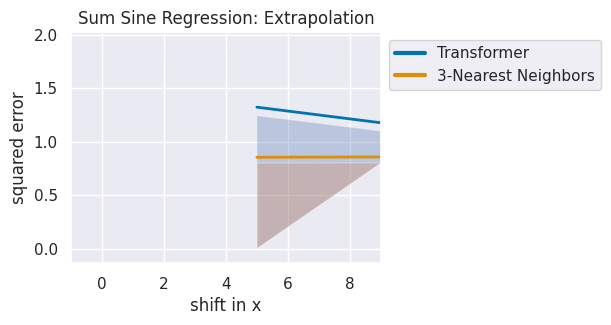

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


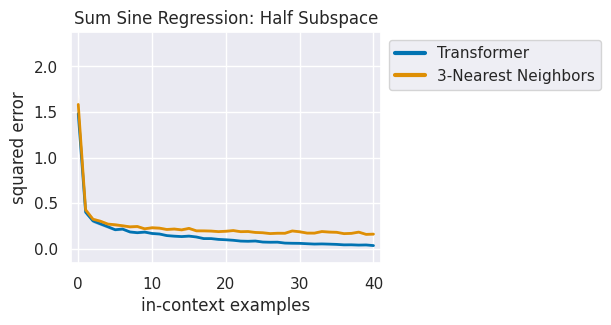

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


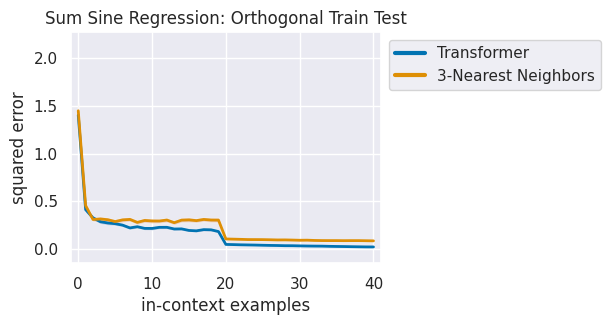

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


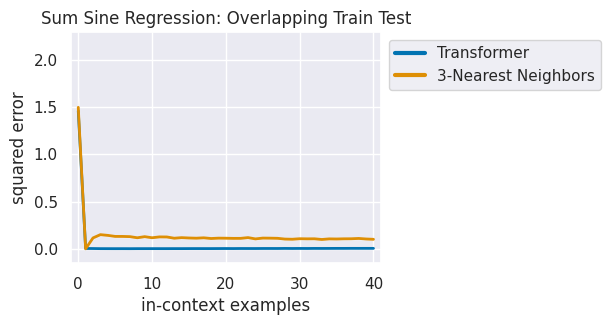

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


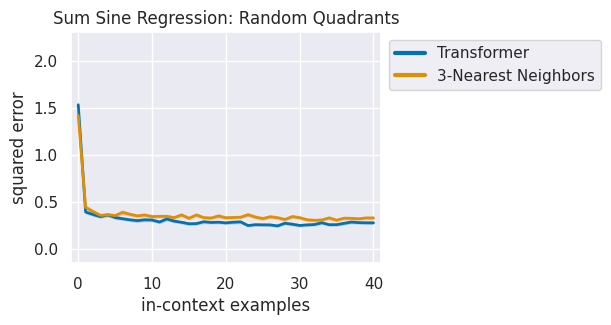

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


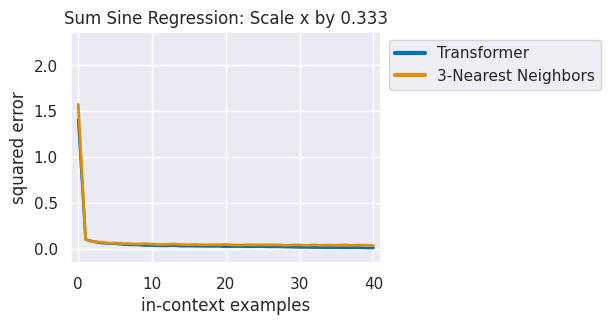

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


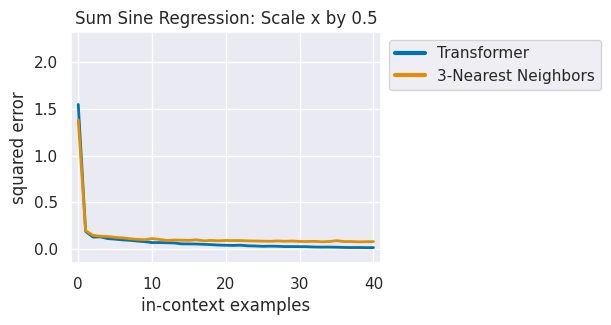

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


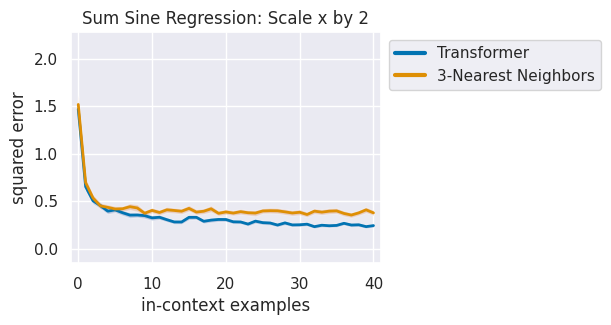

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


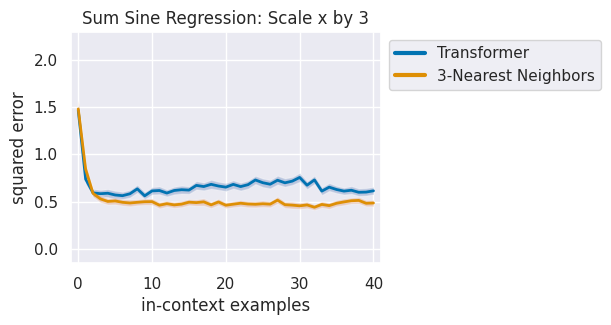

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


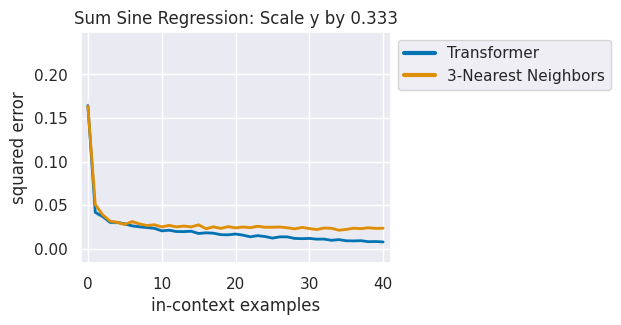

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


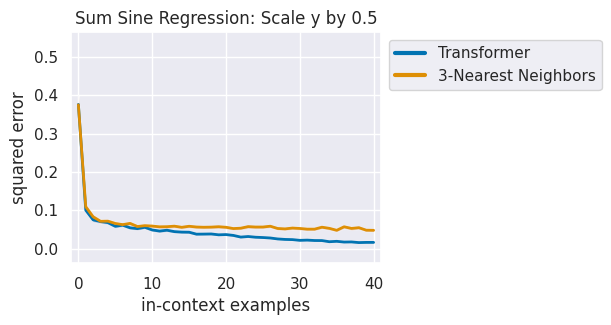

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


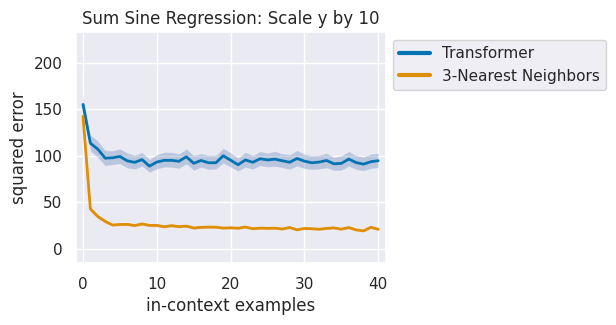

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


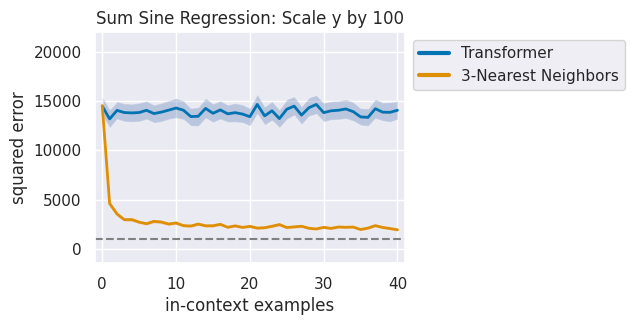

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


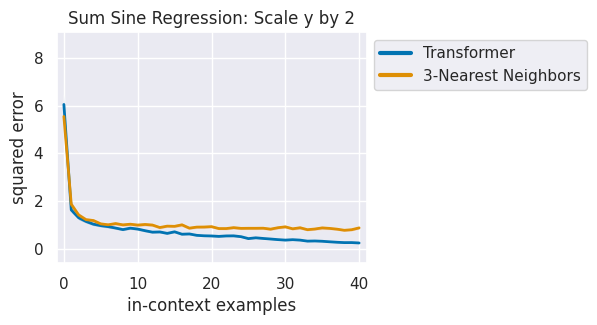

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


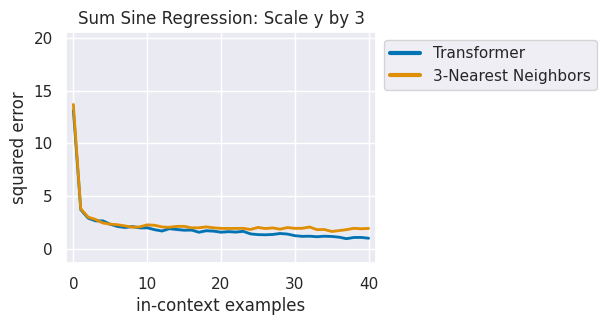

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


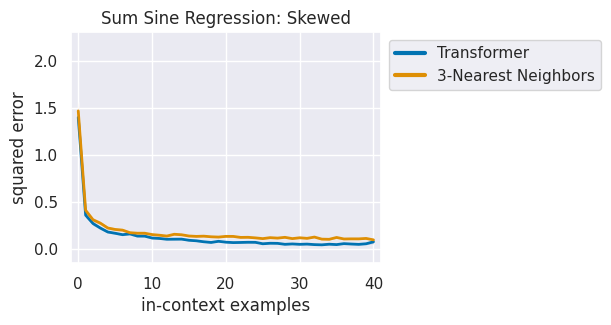

['Transformer', '3-Nearest Neighbors']
dict_keys(['Transformer', '3-Nearest Neighbors'])


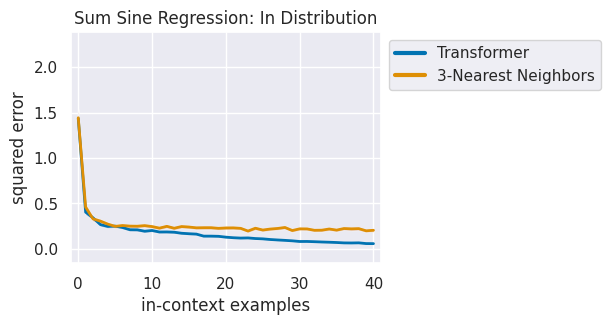

In [22]:
for task in tasks:
    run_id = df[df["task"] == task]["run_id"].iat[0]

    run_path = os.path.join(run_dir, task, run_id)
    recompute_metrics = True

    if recompute_metrics:
        get_run_metrics(run_path, step=500_000)

    
    def valid_row(r):
        return r.task == task and r.run_id == run_id

    metrics = collect_results(run_dir, df, valid_row=valid_row, step=500_000)
    _, conf = get_model_from_run(run_path, only_conf=True)
    n_dims = conf.model.n_dims

    models = relevant_model_names[task]

    for name, metric in metrics.items():
        tmp = name if name != "standard" else "in_distribution"
        tmp = tmp if tmp != "extrapolation_curve" else "extrapolation"
        convert_to_spaces = tmp.replace("-", " ").replace("_", " ").replace("=", " by ")
        words = convert_to_spaces.split()
        lowered = ["x", "y", "by"]
        capitalized = [word if word in lowered else word.capitalize() for word in words]
        title_name = " ".join(capitalized)

        trivial = 1000.0 #don't like it
        is_extrapolation = tmp == "extrapolation"

        fig, ax = basic_plot(metric, models=models, trivial=trivial, is_extrapolation=is_extrapolation)
        
        max_err = 0
        for name, vs in metric.items():
            max_err = max(np.max(vs["mean"]), max_err)

        ax.set_ylim(-.1 * max_err, 1.5 * max_err)
        if not is_extrapolation:
            ax.set_xlim(-1, len(vs["mean"]))
        ax.set_title(task_to_title[task] + ": " + title_name)

        fig_dir = "figures/"
        filename = (title_name
            .lower()
            .replace(" ", "_")
            .replace("0.333", "third")
            .replace("0.5", "half")
            .replace("2", "double")
            .replace("3", "triple")
        )
        task_name = task.replace("_regression", "")
        task_name = task_name if task_name != "saw" else "saw_wave"
        task_dir = "/" + task_name + "/"

        # plt.savefig(fig_dir + task_dir + filename + ".png", bbox_inches="tight")

        plt.show()